# Trump Tweet Data

## Data: Read & Cleaning 

In [1]:
import csv
import pandas as pd
import numpy as np

In [2]:
# Read Trump Tweet file as csv
tweets = pd.read_csv('../datasets/tweets/Trump Tweets 20.01.2017_20.01.2020.csv')
tweets.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,“Trade Deals Drive Stocks To Record Highs.” @F...,01-18-2020 13:35:26,18545,91745,False,1218527317116575744
1,Twitter for iPhone,“Day after day really good news on the economy...,01-18-2020 13:33:13,19310,84492,False,1218526759462801413
2,Twitter for iPhone,Tremendous surge in new housing construction i...,01-18-2020 13:19:20,23364,124835,False,1218523265821544450
3,Twitter for iPhone,A great day at the White House for our Nationa...,01-18-2020 13:09:51,18270,101270,False,1218520880051105792
4,Twitter for iPhone,CONGRATULATIONS! #GeauxTigers https://t.co/Axc...,01-18-2020 00:57:56,21330,103556,False,1218336685450317824


In [3]:
print('Total number of tweets collected: ', len(tweets.index))
print()
print(tweets.columns)

Total number of tweets collected:  12082

Index(['source', 'text', 'created_at', 'retweet_count', 'favorite_count',
       'is_retweet', 'id_str'],
      dtype='object')


In [4]:
# Check for any retweets
tweets['is_retweet'].unique

<bound method Series.unique of 0        False
1        False
2        False
3        False
4        False
         ...  
12077    False
12078    False
12079    False
12080    False
12081    False
Name: is_retweet, Length: 12082, dtype: object>

In [5]:
tweets.dtypes

source            object
text              object
created_at        object
retweet_count      int64
favorite_count     int64
is_retweet        object
id_str             int64
dtype: object

In [6]:
# Drop irrelevant columns
tweets.drop(columns = ['is_retweet'], axis=1, inplace = True)

In [7]:
# Check for nulls in columns
tweets.isnull().sum()

source            0
text              0
created_at        0
retweet_count     0
favorite_count    0
id_str            0
dtype: int64

### Convert 'created_at' column to readable date format

In [8]:
#!pip install arrow
import arrow

In [9]:
# Stub for helpers
# convert utc to est
def convertUTCtoFull(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('dddd, MMM D, YYYY h:mm A')

# convert to year
def convertUTCtoYear(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY')

# convert to month
def convertUTCtoMonth(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('MM')

# convert to day
def convertUTCtoDay(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('D')

# convert to month/day
def convertUTCtoMonthDay(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY-MM-DD')

# convert to day of week
def convertUTCtoDayOfWeek(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('d')

# convert to time
def convertUTCtoHourOfDay(date):
    utc = arrow.get(date)
    return int(utc.to('US/Eastern').format('HH'))

# convert to week of year
def convertUTCtoWeekNumber(date):
    return int(date.strftime('%U'))

# Strip HTML
def stripHTML(html):
    tree = ET.fromstring(html)
    return ET.tostring(tree, encoding='utf8', method='text')

# Encode with closest thing to character
def encodeText(line):
    line = unicodedata.normalize('NFKD', line).encode('ascii','ignore')
    return line

In [10]:
tweets = pd.DataFrame(tweets)
tweets['created_date'] = pd.to_datetime(tweets['created_at'])
tweets['created_date']

0       2020-01-18 13:35:26
1       2020-01-18 13:33:13
2       2020-01-18 13:19:20
3       2020-01-18 13:09:51
4       2020-01-18 00:57:56
                ...        
12077   2017-01-20 04:24:33
12078   2017-01-20 00:40:51
12079   2017-01-19 20:21:36
12080   2017-01-19 20:18:32
12081   2017-01-19 20:13:57
Name: created_date, Length: 12082, dtype: datetime64[ns]

In [11]:
tweets['human_date'] = tweets['created_date'].apply(convertUTCtoFull)
tweets['year'] = tweets['created_date'].apply(convertUTCtoYear)
tweets['month/day'] = tweets['created_date'].apply(convertUTCtoMonthDay)
tweets['month'] = tweets['created_date'].apply(convertUTCtoMonth)
tweets['day'] = tweets['created_date'].apply(convertUTCtoDay)
tweets['day of week'] = tweets['created_date'].apply(convertUTCtoDayOfWeek)
tweets['hour'] = tweets['created_date'].apply(convertUTCtoHourOfDay)
tweets['week'] = tweets['created_date'].apply(convertUTCtoWeekNumber) 
tweets.set_index('created_date', inplace=True)

In [12]:
tweets.head()

,source,text,created_at,retweet_count,favorite_count,id_str,human_date,year,month/day,month,day,day of week,hour,week
created_date,,,,,,,,,,,,,,
2020-01-18 13:35:26,Twitter for iPhone,“Trade Deals Drive Stocks To Record Highs.” @F...,01-18-2020 13:35:26,18545,91745,1218527317116575744,"Saturday, Jan 18, 2020 8:35 AM",2020,2020-01-18,01,18,6,8,2
2020-01-18 13:33:13,Twitter for iPhone,“Day after day really good news on the economy...,01-18-2020 13:33:13,19310,84492,1218526759462801413,"Saturday, Jan 18, 2020 8:33 AM",2020,2020-01-18,01,18,6,8,2
2020-01-18 13:19:20,Twitter for iPhone,Tremendous surge in new housing construction i...,01-18-2020 13:19:20,23364,124835,1218523265821544450,"Saturday, Jan 18, 2020 8:19 AM",2020,2020-01-18,01,18,6,8,2
2020-01-18 13:09:51,Twitter for iPhone,A great day at the White House for our Nationa...,01-18-2020 13:09:51,18270,101270,1218520880051105792,"Saturday, Jan 18, 2020 8:09 AM",2020,2020-01-18,01,18,6,8,2
2020-01-18 00:57:56,Twitter for iPhone,CONGRATULATIONS! #GeauxTigers https://t.co/Axc...,01-18-2020 00:57:56,21330,103556,1218336685450317824,"Friday, Jan 17, 2020 7:57 PM",2020,2020-01-17,01,17,5,19,2


## Natural Language Processing

<b>Text Normalisation</b>
- Text data contains several "noise" in the form of special characters such as hashtags, punctuation, numbers and the casing of words i.e  if both upper case and lower case versions of the same words are included, the computer will detect these as different entities, even though they may be the same. All of which are difficult for computers to understand if they are present in the data. Therefore, in order for machines to easily detect the patterns in the data, it is key to process language data by removing these noise known as text normalisation. 

<b>Stop words</b>
- Default stop words from nltk were used. Stop words are commonly occurring words that for some computational processes provide little information or in some cases introduce unnecessary noise and therefore should be removed. This is particularly the case for text classification tasks.

<b>Stemming</b>
- Stemming is the process of reducing words to their root form. For example, the words “rain”, “raining” and “rained” have very similar, and in many cases, the same meaning. The process of stemming will reduce these to the root form of “rain”. This is again a way to reduce noise and the dimensionality of the data. 
- Note that the tweets need to be tokenise before stemming the data. This is a method used to split the text into its constituent parts usually words. The code below uses NLTK to do this. I have put the output into a new column called “text_tokens”.

<b>Lemmatization</b>
- Words were lemmatized to reduce each word to its base form.
- The goal of lemmatization is the same as for stemming, in that it aims to reduce words to their root form. However, stemming is known to be a fairly crude method of doing this. Lemmatization, on the other hand, is a tool that performs full morphological analysis to more accurately find the root, or “lemma” for a word.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
import regex as re

In [14]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [15]:
# Text cleaning
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text, stem=False):
    # Remove http link, user, special characters, punctuations, numbers,
    # Convert text to lowercase  
    # Remove stop words
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [16]:
%%time
tweets['text'] = tweets['text'].apply(lambda x: preprocess(x))

CPU times: user 979 ms, sys: 14 ms, total: 993 ms
Wall time: 993 ms


In [17]:
from nltk.stem import WordNetLemmatizer

In [18]:
#Lemmatise
lemmatizer = WordNetLemmatizer()

for i in range(len(tweets['text'])):
    words = tweets.iloc[i,1]
    # Print(words)
    list_words = words.split()
    text_lem = [lemmatizer.lemmatize(i) for i in list_words]
    cleaned_string = ' '.join(text_lem)
    tweets.iloc[i,1] = cleaned_string

In [19]:
# Example of outcome
tweets.text[0]

'trade deal drive stock record high foxnews'

## EDA: Trump's Tweet

### Tweets Per Source

In [20]:
tweets['source'].unique()

array(['Twitter for iPhone', 'Twitter Media Studio', 'Twitter Web App',
       'Twitter Web Client', 'Twitter for iPad', 'Media Studio',
       'Twitter Ads', 'Twitter for Android'], dtype=object)

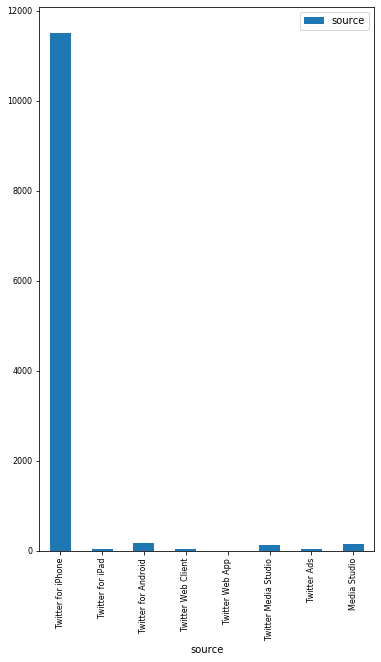

In [21]:
tweetsPerSource = tweets[['source']].groupby(tweets['source']).count()
tweetsPerSource.iloc[::-1].plot(kind='bar', figsize=(6,10), fontsize=8)

> In a previous [research](http://varianceexplained.org/r/trump-tweets/), it was concluded that tweets from Donald Trump's account posted via Android and iPhone were evidently from different people due to the posting made at different times of day and the use of hashtags, links, and retweets in distinct ways. Also, it was noted that the Android tweets appears angrier and more negative, while the iPhone tweets tend to be benign announcements and pictures. 
>
> However, noted that the previous research was performed in 2016 and the tweets collected for this project was from 2017 onwards. Also, the majority of tweets posted during this period was mainly from one source (i.e. iPhone). Therefore, the source of the tweet is assumed to be consistent acrossed all platforms for this project. 

### Tweets Per Year

           year
year           
2017   5.917808
2018   7.717808
2019  19.002740
2020   0.463014


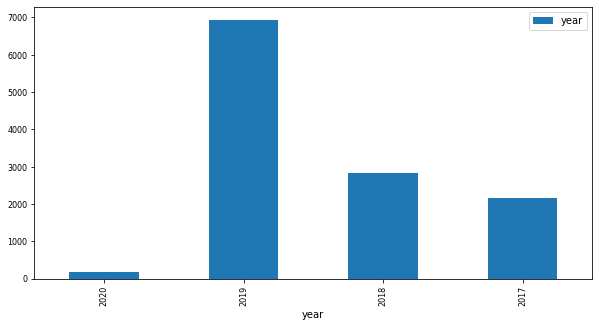

In [22]:
tweetsPerYear = tweets[['year']].groupby(tweets['year']).count()
tweetsPerYear.iloc[::-1].plot(kind='bar', figsize=(10,5), fontsize=8)

tweetsPerday = tweetsPerYear/365
print(tweetsPerday)

> Donald Trump (@realDonaldTrump) currently has 77.8m followers on Twitter
>
> From the bar graph above, it is evident that Trump is highly active on his Twitter account since he sworn in as the President of the United Sates with an upward trend of number of twitter posted per year:
- 2017: 2,160 (an average of ~6 tweets per day)
- 2018: 2,817 (an average of ~8 tweets per day)
- 2019: 6,936 (an average of ~19 tweets per day)
- 2020: N/A (note that 2020 data was only available till date of project carried out i.e. 23 Mar 2020) 
>
> The above evidence is beneficial to this project as it aims to analyse the effectiveness of using President Trump’s tweets as a signal for predicting changes in short term stock prices.

### Tweets Per Month

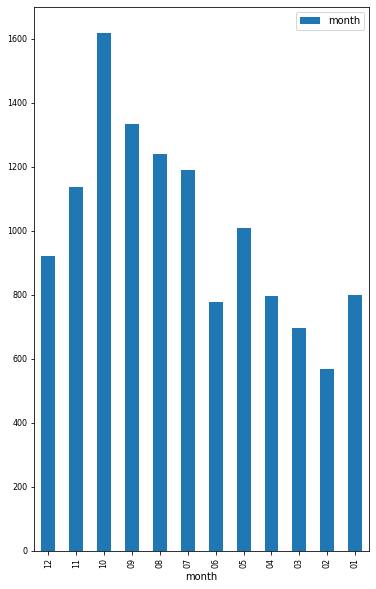

In [23]:
tweetsPerMonth = tweets[['month']].groupby(tweets['month']).count()
tweetsPerMonth.iloc[::-1].plot(kind='bar', figsize=(6,10), fontsize=8)

### 'Re-tweet' count & 'Like' count

In [24]:
# Create time series for data:
tfav = pd.Series(data=tweets['favorite_count'].values, index=tweets['month/day'])
tret = pd.Series(data=tweets['retweet_count'].values, index=tweets['month/day'])

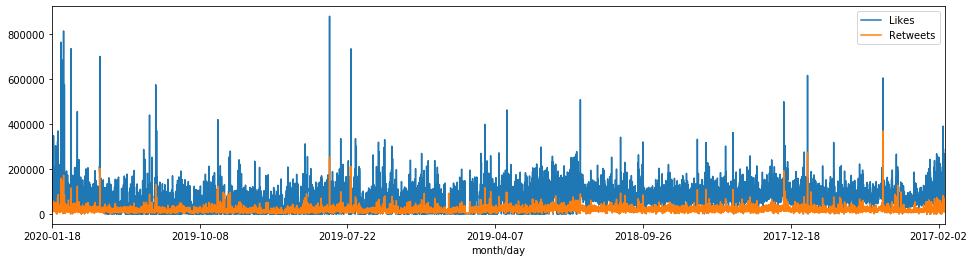

In [25]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

> From the above graph, noted that the number of likes and retweets by Trump's followers appears to have a fairly consistent pattern. However, the numner of retweets are generally less than the number of likes. 

### Top Words in Trump's Tweet

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

In [27]:
text_cleaned = tweets['text']
len(text_cleaned)

12082

In [28]:
# Print top words in Trump's Tweets
cvec = CountVectorizer(stop_words='english')

text_cleaned = tweets['text']

text_cvec = cvec.fit_transform(text_cleaned)

text_cvec_df = pd.DataFrame(text_cvec.toarray(), columns=cvec.get_feature_names())

top_text = text_cvec_df.sum(axis = 0)

top_text.sort_values(ascending = False)

# Top words in Trump's Tweets
df_top_text = top_text.to_frame(name='Count')
df_top_text['Word'] = df_top_text.index
df_top_text.reset_index(drop=True, inplace=True)
df_top_text['Freq'] = df_top_text['Count'] / len(text_cleaned) * 100

cols = ['Word','Count','Freq']
df_top_text = df_top_text[cols]
df_top_text.sort_values(by='Count',ascending=False, inplace=True)
df_top_text.head(30)

,Word,Count,Freq
6041,great,2480,20.526403
10971,rt,2143,17.737130
1788,amp,1963,16.247310
9822,president,1399,11.579209
4165,democrat,1336,11.057772
9432,people,1261,10.437014
3732,country,1144,9.468631
12868,trump,1042,8.624400
13847,year,893,7.391160
8844,news,891,7.374607


### Bar plot: Top 30 Words in Trump's Tweets

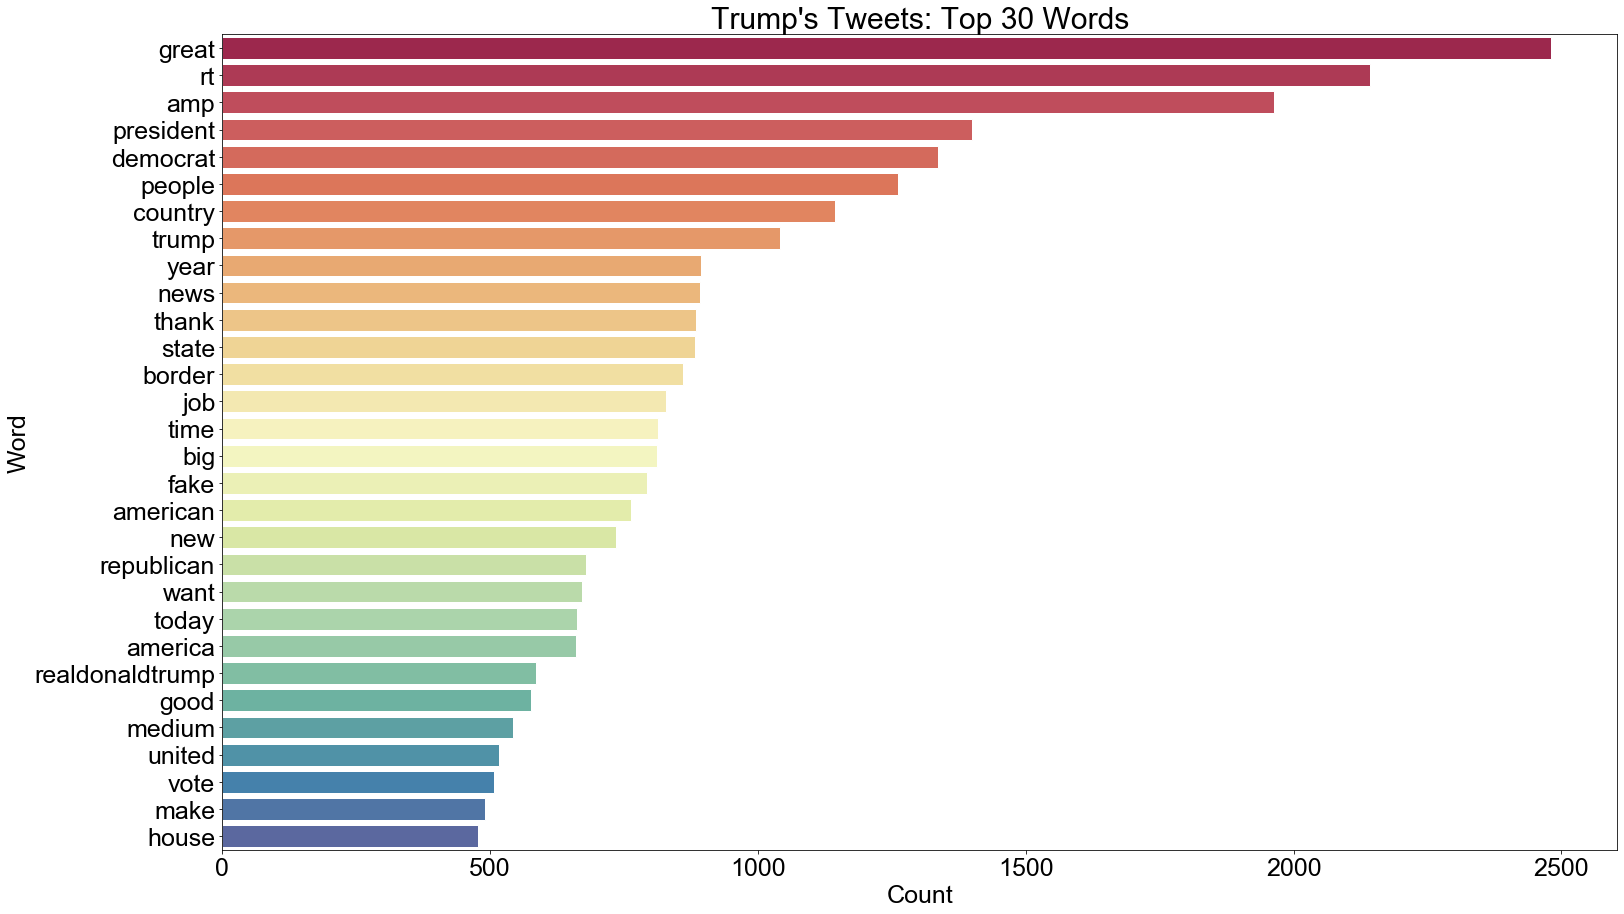

In [29]:
plt.figure(figsize=(25,15))
plt.title("Trump's Tweets: Top 30 Words",fontsize=30)

sns.set_style("dark")
sns.barplot(data=df_top_text.head(30),x='Count',y='Word',orient='h', palette='Spectral')
sns.color_palette("Set1", n_colors=8, desat=.5)

plt.xlabel('Count',fontsize=25)
plt.ylabel('Word',fontsize=25)
plt.tick_params(labelsize=25)

> From the top words observed, it is interesting to note: 
- The word "democrat" has been used more than "republican" which is ironic as Trump represents the Republician. It is known that Trump is candid with his tweets and this supports the fact that he often make ‘ad hominem’ remarks against his critics, especially against the Democratic Party. Twitter played a huge part in the previous general election, with Trump’s comments eventually prompting an investigation into former rival presidential candidate Hillary Clinton.
- Positive words such as "great" and "good" are within his top words, which explains why there are more positive sentiment in his tweets. Also, "great" has been used more than "good", which emphasise on the fact that Trump usually over hype news.
- Trump was previously a businessman. However, since he has became the President of the US, his top words are mainly related to politics, which shows how media and news are able to make an impact to people's views. 

### Top Bigram in Trump's Tweets

In [30]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(tweets['text'], 20)

df_top_bigram = pd.DataFrame(common_words, columns = ['text' , 'count'])

cols = ['text','count']
df_top_bigram = df_top_bigram[cols]
df_top_bigram.sort_values(by='count',ascending=False, inplace=True)
df_top_bigram.head(20)

,text,count
0,fake news,621
1,united state,433
2,witch hunt,344
3,twitter iphone,287
4,president trump,240
5,rt realdonaldtrump,223
6,white house,216
7,america great,214
8,news medium,205
9,north korea,182


### Bar plot: Top 20 Bigram in Trump's Tweets

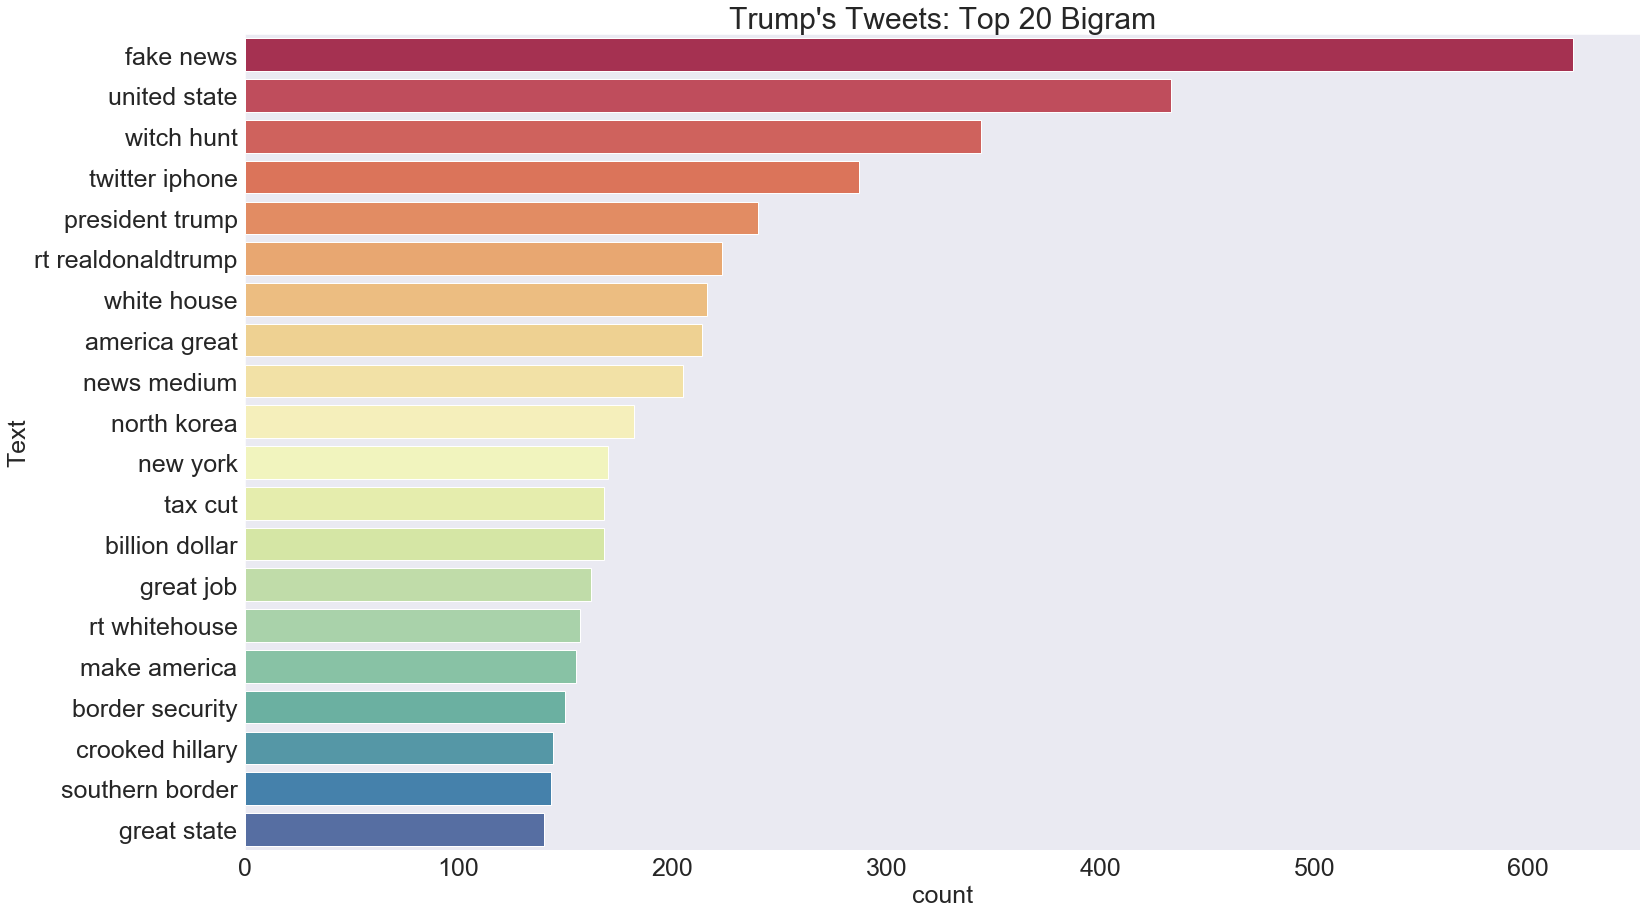

In [31]:
plt.figure(figsize=(25,15))
plt.title("Trump's Tweets: Top 20 Bigram",fontsize=30)

sns.set_style("dark")
sns.barplot(data=df_top_bigram.head(30),x='count',y='text',orient='h', palette='Spectral')
sns.color_palette("Set1", n_colors=8, desat=.5)

plt.xlabel('count',fontsize=25)
plt.ylabel('Text',fontsize=25)
plt.tick_params(labelsize=25)

> Upon performing the above EDA, the information provided appears to be relevant to the problem statement. Hence, considered likely to be able to answer their problem statement with the provided data given. As such, I am able to move on to the next part of the project - sentimental analysis and modelling

## Sentiment analysis using VADER

Assuming that the changes in stock prices of a company, the rises and falls are influenced by the public opinions being expressed in tweets about that company, it is important to understand the author’s opinion from a piece of text, which is the objective of sentiment analysis.

Sentiment analysis is the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically recognize, extract, quantify, and study emotional states and subjective information. 

Usually, sentiment analysis’ purpose is to determine the attitude of a speaker, writer, or other subject with respect to overall contextual emotional reaction to a document or event. 

Sentiment analysis is a process that aims to determine the emotional tone of text or voice data. For the
sentiment analysis of Trump’s tweets, the Python module ‘VADER’ aims to determine the sentiment of a tweet by parsing through each sentence - each tweet text is taken as an input and passed to an algorithm that
outputs a perceived sentiment score between -1 and +1, essentially determine whether each Tweet is positive, neutral, or negative. For instance, a Tweet including the word “wrong” would usually be given a negative score. Moreover, a Tweet containing the phrase “thank you” would usually be given a positive score. Of course, there are ways in which a Tweet may not always be given the correct sentiment, specifically for economic variables. For example, “high unemployment” may be given a positive sentiment when low unemployment is actually better for the economy. 

However, for this project, the assumption that I have used is the default VADER functionality as it has already undergone testing on large datasets through machine learning. Therefore, the assumption is that a positive tweet posted by Donald Trump about a company would encourage people to invest in the stocks of that company and as a result the stock price of that company would increase, vice versa. 

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    """ Calculate and return the nltk vader (lexicon method) sentiment """
    return sid.polarity_scores(text)['compound']

# Create a new column for vader compound sentiment score
tweets['vader compound'] = tweets['text'].apply(vader_sentiment)

def categorise_sentiment(sentiment, neg_threshold=-0.005, pos_threshold=0.005):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    if sentiment < neg_threshold:
        label = 'negative'
    elif sentiment > pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label


In [33]:
# Create a new column with vader sentiment label based on vader compound score
tweets['vader sentiment'] = tweets['vader compound'].apply(categorise_sentiment)

In [34]:
tweets.head(50)

,source,text,created_at,retweet_count,favorite_count,id_str,human_date,year,month/day,month,day,day of week,hour,week,vader compound,vader sentiment
created_date,,,,,,,,,,,,,,,,
2020-01-18 13:35:26,Twitter for iPhone,trade deal drive stock record high foxnews,01-18-2020 13:35:26,18545,91745,1218527317116575744,"Saturday, Jan 18, 2020 8:35 AM",2020,2020-01-18,01,18,6,8,2,0.0000,neutral
2020-01-18 13:33:13,Twitter for iPhone,day day really good news economy way happen ac...,01-18-2020 13:33:13,19310,84492,1218526759462801413,"Saturday, Jan 18, 2020 8:33 AM",2020,2020-01-18,01,18,6,8,2,0.6901,positive
2020-01-18 13:19:20,Twitter for iPhone,tremendous surge new housing construction dece...,01-18-2020 13:19:20,23364,124835,1218523265821544450,"Saturday, Jan 18, 2020 8:19 AM",2020,2020-01-18,01,18,6,8,2,0.0000,neutral
2020-01-18 13:09:51,Twitter for iPhone,great day white house national champion lsu tiger,01-18-2020 13:09:51,18270,101270,1218520880051105792,"Saturday, Jan 18, 2020 8:09 AM",2020,2020-01-18,01,18,6,8,2,0.8402,positive
2020-01-18 00:57:56,Twitter for iPhone,congratulation geauxtigers,01-18-2020 00:57:56,21330,103556,1218336685450317824,"Friday, Jan 17, 2020 7:57 PM",2020,2020-01-17,01,17,5,19,2,0.5994,positive
2020-01-17 23:10:50,Twitter for iPhone,,01-17-2020 23:10:50,27128,102815,1218309736594116608,"Friday, Jan 17, 2020 6:10 PM",2020,2020-01-17,01,17,5,18,2,0.0000,neutral
2020-01-17 23:10:21,Twitter for iPhone,noble people iran love america deserve governm...,01-17-2020 23:10:21,21993,79519,1218309612304248834,"Friday, Jan 17, 2020 6:10 PM",2020,2020-01-17,01,17,5,18,2,0.5994,positive
2020-01-17 22:22:05,Twitter for iPhone,2nd amendment serious attack great commonwealt...,01-17-2020 22:22:05,49806,181446,1218297464941314049,"Friday, Jan 17, 2020 5:22 PM",2020,2020-01-17,01,17,5,17,2,0.6808,positive
2020-01-17 22:22:05,Twitter for iPhone,called supreme leader iran supreme lately nast...,01-17-2020 22:22:05,35677,178037,1218297466656829440,"Friday, Jan 17, 2020 5:22 PM",2020,2020-01-17,01,17,5,17,2,0.5994,positive


In [35]:
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

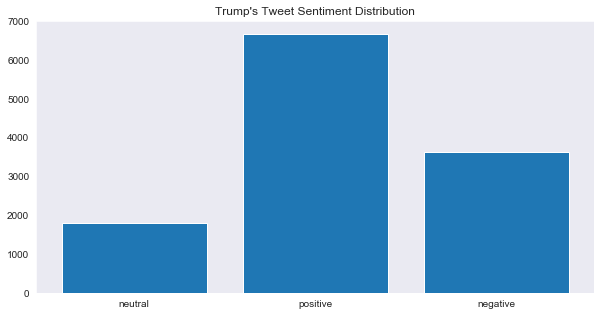

In [36]:
target_cnt = Counter(tweets['vader sentiment'])

plt.figure(figsize=(10,5))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Trump's Tweet Sentiment Distribution");

In [37]:
def categorise_SA(sentiment, neg_tweets='negative', pos_tweets='positive'):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    if sentiment == neg_tweets:
        label = -1
    elif sentiment == pos_tweets:
        label = 1
    else:
        label = 0
    return label

In [38]:
# Create a new column with vader sentiment label based on vader compound score
tweets['SA'] = tweets['vader sentiment'].apply(categorise_SA)

# Display the updated dataframe with the new column:
display(tweets.head(50))

,source,text,created_at,retweet_count,favorite_count,id_str,human_date,year,month/day,month,day,day of week,hour,week,vader compound,vader sentiment,SA
created_date,,,,,,,,,,,,,,,,,
2020-01-18 13:35:26,Twitter for iPhone,trade deal drive stock record high foxnews,01-18-2020 13:35:26,18545,91745,1218527317116575744,"Saturday, Jan 18, 2020 8:35 AM",2020,2020-01-18,01,18,6,8,2,0.0000,neutral,0
2020-01-18 13:33:13,Twitter for iPhone,day day really good news economy way happen ac...,01-18-2020 13:33:13,19310,84492,1218526759462801413,"Saturday, Jan 18, 2020 8:33 AM",2020,2020-01-18,01,18,6,8,2,0.6901,positive,1
2020-01-18 13:19:20,Twitter for iPhone,tremendous surge new housing construction dece...,01-18-2020 13:19:20,23364,124835,1218523265821544450,"Saturday, Jan 18, 2020 8:19 AM",2020,2020-01-18,01,18,6,8,2,0.0000,neutral,0
2020-01-18 13:09:51,Twitter for iPhone,great day white house national champion lsu tiger,01-18-2020 13:09:51,18270,101270,1218520880051105792,"Saturday, Jan 18, 2020 8:09 AM",2020,2020-01-18,01,18,6,8,2,0.8402,positive,1
2020-01-18 00:57:56,Twitter for iPhone,congratulation geauxtigers,01-18-2020 00:57:56,21330,103556,1218336685450317824,"Friday, Jan 17, 2020 7:57 PM",2020,2020-01-17,01,17,5,19,2,0.5994,positive,1
2020-01-17 23:10:50,Twitter for iPhone,,01-17-2020 23:10:50,27128,102815,1218309736594116608,"Friday, Jan 17, 2020 6:10 PM",2020,2020-01-17,01,17,5,18,2,0.0000,neutral,0
2020-01-17 23:10:21,Twitter for iPhone,noble people iran love america deserve governm...,01-17-2020 23:10:21,21993,79519,1218309612304248834,"Friday, Jan 17, 2020 6:10 PM",2020,2020-01-17,01,17,5,18,2,0.5994,positive,1
2020-01-17 22:22:05,Twitter for iPhone,2nd amendment serious attack great commonwealt...,01-17-2020 22:22:05,49806,181446,1218297464941314049,"Friday, Jan 17, 2020 5:22 PM",2020,2020-01-17,01,17,5,17,2,0.6808,positive,1
2020-01-17 22:22:05,Twitter for iPhone,called supreme leader iran supreme lately nast...,01-17-2020 22:22:05,35677,178037,1218297466656829440,"Friday, Jan 17, 2020 5:22 PM",2020,2020-01-17,01,17,5,17,2,0.5994,positive,1


In [39]:
# Construct lists with classified tweets:
pos_tweets = [ tweet for index, tweet in enumerate(tweets['text']) if tweets['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(tweets['text']) if tweets['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(tweets['text']) if tweets['SA'][index] < 0]

In [40]:
# Print percentages:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(tweets['text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(tweets['text'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(tweets['text'])))

Percentage of positive tweets: 55.20609170667108%
Percentage of neutral tweets: 14.815427909286543%
Percentage de negative tweets: 29.978480384042378%


## Save CSV

In [41]:
tweets.head()

,source,text,created_at,retweet_count,favorite_count,id_str,human_date,year,month/day,month,day,day of week,hour,week,vader compound,vader sentiment,SA
created_date,,,,,,,,,,,,,,,,,
2020-01-18 13:35:26,Twitter for iPhone,trade deal drive stock record high foxnews,01-18-2020 13:35:26,18545,91745,1218527317116575744,"Saturday, Jan 18, 2020 8:35 AM",2020,2020-01-18,01,18,6,8,2,0.0000,neutral,0
2020-01-18 13:33:13,Twitter for iPhone,day day really good news economy way happen ac...,01-18-2020 13:33:13,19310,84492,1218526759462801413,"Saturday, Jan 18, 2020 8:33 AM",2020,2020-01-18,01,18,6,8,2,0.6901,positive,1
2020-01-18 13:19:20,Twitter for iPhone,tremendous surge new housing construction dece...,01-18-2020 13:19:20,23364,124835,1218523265821544450,"Saturday, Jan 18, 2020 8:19 AM",2020,2020-01-18,01,18,6,8,2,0.0000,neutral,0
2020-01-18 13:09:51,Twitter for iPhone,great day white house national champion lsu tiger,01-18-2020 13:09:51,18270,101270,1218520880051105792,"Saturday, Jan 18, 2020 8:09 AM",2020,2020-01-18,01,18,6,8,2,0.8402,positive,1
2020-01-18 00:57:56,Twitter for iPhone,congratulation geauxtigers,01-18-2020 00:57:56,21330,103556,1218336685450317824,"Friday, Jan 17, 2020 7:57 PM",2020,2020-01-17,01,17,5,19,2,0.5994,positive,1


In [42]:
tweets.isnull().sum()

source             0
text               0
created_at         0
retweet_count      0
favorite_count     0
id_str             0
human_date         0
year               0
month/day          0
month              0
day                0
day of week        0
hour               0
week               0
vader compound     0
vader sentiment    0
SA                 0
dtype: int64

In [43]:
tweets.to_csv('../datasets/tweets/cleaned_tweets.csv', sep='\t')

# Data Processing: Combine tweets sentiment into single day

In [44]:
tweets_df = pd.read_csv('../datasets/tweets/cleaned_tweets.csv', sep='\t', parse_dates=['month/day'], index_col=['month/day'])

In [45]:
tweets_df.head()

,created_date,source,text,created_at,retweet_count,favorite_count,id_str,human_date,year,month,day,day of week,hour,week,vader compound,vader sentiment,SA
month/day,,,,,,,,,,,,,,,,,
2020-01-18,2020-01-18 13:35:26,Twitter for iPhone,trade deal drive stock record high foxnews,01-18-2020 13:35:26,18545,91745,1218527317116575744,"Saturday, Jan 18, 2020 8:35 AM",2020,1,18,6,8,2,0.0000,neutral,0
2020-01-18,2020-01-18 13:33:13,Twitter for iPhone,day day really good news economy way happen ac...,01-18-2020 13:33:13,19310,84492,1218526759462801413,"Saturday, Jan 18, 2020 8:33 AM",2020,1,18,6,8,2,0.6901,positive,1
2020-01-18,2020-01-18 13:19:20,Twitter for iPhone,tremendous surge new housing construction dece...,01-18-2020 13:19:20,23364,124835,1218523265821544450,"Saturday, Jan 18, 2020 8:19 AM",2020,1,18,6,8,2,0.0000,neutral,0
2020-01-18,2020-01-18 13:09:51,Twitter for iPhone,great day white house national champion lsu tiger,01-18-2020 13:09:51,18270,101270,1218520880051105792,"Saturday, Jan 18, 2020 8:09 AM",2020,1,18,6,8,2,0.8402,positive,1
2020-01-17,2020-01-18 00:57:56,Twitter for iPhone,congratulation geauxtigers,01-18-2020 00:57:56,21330,103556,1218336685450317824,"Friday, Jan 17, 2020 7:57 PM",2020,1,17,5,19,2,0.5994,positive,1


In [46]:
tweets_df.columns

Index(['created_date', 'source', 'text', 'created_at', 'retweet_count',
       'favorite_count', 'id_str', 'human_date', 'year', 'month', 'day',
       'day of week', 'hour', 'week', 'vader compound', 'vader sentiment',
       'SA'],
      dtype='object')

In [47]:
# Drop irrelevant columns
tweets_df.drop(columns = ['text','created_date', 'source', 'created_at',
                       'id_str', 'human_date', 'year','month',
       'day', 'day of week', 'hour', 'week','SA'], axis=1, inplace = True)

In [48]:
tweets_sum_df = tweets_df.resample('D').sum()

In [49]:
tweets_sum_df.isnull().sum()

retweet_count     0
favorite_count    0
vader compound    0
dtype: int64

In [50]:
tweets_sum_df.head(50)

,retweet_count,favorite_count,vader compound
month/day,,,
2017-01-19,84547,466823,2.4754
2017-01-20,415061,1878671,2.2815
2017-01-21,23337,177579,0.8807
2017-01-22,184236,949408,1.5419
2017-01-23,26750,177839,0.4939
2017-01-24,247498,1162781,1.6901
2017-01-25,138054,761424,0.7527
2017-01-26,128887,609647,-0.4878
2017-01-27,168114,841537,1.4541


In [51]:
def categorise_sentiment(sentiment, neg_threshold=-0.005, pos_threshold=0.005):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    if sentiment < neg_threshold:
        label = 'negative'
    elif sentiment > pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label

# new col with vader sentiment label based on vader compound score
tweets_sum_df['vader sentiment'] = tweets_sum_df['vader compound'].apply(categorise_sentiment)

In [52]:
tweets_sum_df.head(50)

,retweet_count,favorite_count,vader compound,vader sentiment
month/day,,,,
2017-01-19,84547,466823,2.4754,positive
2017-01-20,415061,1878671,2.2815,positive
2017-01-21,23337,177579,0.8807,positive
2017-01-22,184236,949408,1.5419,positive
2017-01-23,26750,177839,0.4939,positive
2017-01-24,247498,1162781,1.6901,positive
2017-01-25,138054,761424,0.7527,positive
2017-01-26,128887,609647,-0.4878,negative
2017-01-27,168114,841537,1.4541,positive


In [53]:
tweets_sum_df.to_csv('../datasets/tweets/cleaned_tweets_sum_df.csv', sep='\t')